#HW5 N-step TD method


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rd

### Enviroment
1. Episode task, $\gamma$ =1, $\alpha$=0.1, $\epsilon$=0.3
2. r=-100 if moves into the swamps; all other transitions yield r=-1
3. Use 30 simulation runs to estimate the average value 
4. Environment size is 10x5 

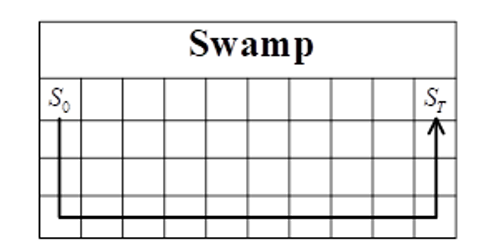

In [ ]:
GAMMA = 1
ALPHA = 0.1
EPSILON = 0.3
EPISODES = 1000
N_step = 5
WORLD_SIZE = [5,10]
SWAMPS = [[0,i]for i in range(10)]
S0 = [1, 0]
ST = [1, 9]
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]]

GAMMA_ = []
for i in range(N_step):
    GAMMA_.append(GAMMA ** i)

In [ ]:
def step(state, action):
  state = np.array(state)
  state_n = (state+action)
  x , y = state_n
  x = np.clip(x,0,4)
  y = np.clip(y,0,9)
  state_n = [x , y]

  if state_n in SWAMPS:
    reward = -100
  else:
    reward = -1
  return [state_n, reward]

In [ ]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(qtable.shape[2])

In [ ]:
def sarsa5():
  
  returns = []
  
      
######## YOUR CODE HERE ########
  
  qtable = np.zeros((5,10,4))
  qtable[ST[0]][ST[1]][:]=np.zeros(4)
  
  for i in range(EPISODES):
      G = 0
      state = S0
      a = chooseAction(state, qtable, EPSILON)
      trajectory = []
      trajectoryR = []
      
      while state != ST:
          
          trajectory.append([state,a])
          action = ACTIONS[a]
          state , reward = step(state,action)
          a = chooseAction(state, qtable, EPSILON)
          trajectoryR.append(reward)
          
          if len(trajectoryR) == N_step:
              G2_ = 0
              for j in range(N_step):
                  G2_ = G2_ + GAMMA_[j]*trajectoryR[j]
              x , y = state
              G2 = G2_ + GAMMA ** N_step * qtable[x][y][a]
              x2 , y2 = trajectory[0][0]
              a2 = trajectory[0][1]
              qtable[x2][y2][a2] = qtable[x2][y2][a2] + ALPHA*(G2-qtable[x2][y2][a2])
              
              trajectory.pop(0)
              trajectoryR.pop(0)
          G = G + GAMMA * reward
      Remain_step = len(trajectoryR)
      G2 = 0
      for j in range(Remain_step):
          G2 = trajectoryR[j] + G2 * GAMMA
          x2 , y2 = trajectory[j][0]
          a2 = trajectory[j][1]
          qtable[x2][y2][a2] = qtable[x2][y2][a2] + ALPHA*(G2-qtable[x2][y2][a2])
      returns.append(G)
      
####################################
    
  return returns

# Result(60%):

Average 30 simulation, 1000 episode per simulation.

In [ ]:
def drawTable(data):
  fig = plt.figure()
  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.gca().invert_yaxis()
  for i in range(data.shape[1]):
    for j in range(data.shape[0]):
      plt.plot((i,i),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j,j),'-k')
      plt.plot((i+1,i),(j,j+1),'-k')
      plt.plot((i+1,i+1),(j,j+1),'-k')
      plt.plot((i,i+1),(j+1,j+1),'-k')
      temp = max(data[j][i])
      if data[j][i][0]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i,j+1]], color='yellow'))
      if data[j][i][1]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j], [i+1,j]], color='yellow'))
      if data[j][i][2]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i+1,j], [i+1,j+1]], color='yellow'))
      if data[j][i][3]==temp:
        plt.gca().add_patch(plt.Polygon([[i+0.5,j+0.5], [i,j+1], [i+1,j+1]], color='yellow'))

      plt.text(i+0.2,j+0.5,'%.1f' %data[j][i][0], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.2,'%.1f' %data[j][i][1], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.8,j+0.5,'%.1f' %data[j][i][2], verticalalignment='center', horizontalalignment='center')
      plt.text(i+0.5,j+0.8,'%.1f' %data[j][i][3], verticalalignment='center', horizontalalignment='center')

  plt.show()

In [ ]:
def averages(a):
  return np.array([np.average(a[:i+1]) for i in range(len(a))])

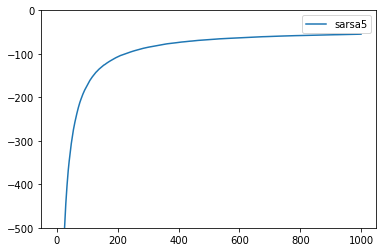

In [ ]:
plt.plot(np.average([averages(sarsa5()) for i in range(30)],axis=0),label='sarsa5')
plt.ylim(-500, 0)
plt.legend()
plt.show()

#Experiments and Analysis(40%)

1. Plot the Q-values of Sarsa and 5-steps Sarsa, and explain your result.(15%)
2. Plot the average returns of Sarsa and 5-steps Sarsa, and explain your result(15%)
3. Varying n-steps and get average returns, then compare by overlap the plot(10%) 



Ans 1.

比較Sarsa和5-step Sarsa在200個episode與1000個episode學習後的Q-value table，5-step Sarsa在200個episode和1000個episode的Q-value table差異不大，代表其已在200個episode的學習後收斂到接近最後的最佳策略，對比Sarsa在200個episode和1000個episode的Q-value table仍然有段差異。


透過觀察在學習過程中Q-value變化情形，可以看出Sarsa和5-Step Sarsa學習速度上的差異。由於5-Step Sarsa每次更新五個動作，相較Sarsa每次只更新一個動作，雖然會增加整體計算量，但在學習效率上來得更快。

由下圖可看出Sarsa和5-Step Sarsa的Q-value，在不同episodes學習過程中的變化情形。

$\bullet\,Q-values\;of\;Sarsa$

$\;After\,1\,episode$

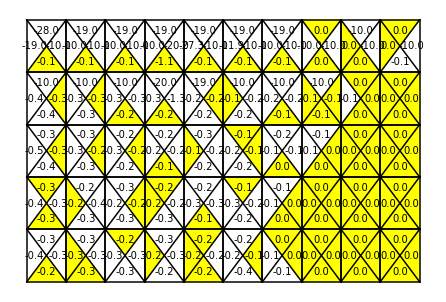

$\;After\,200\,episodes$

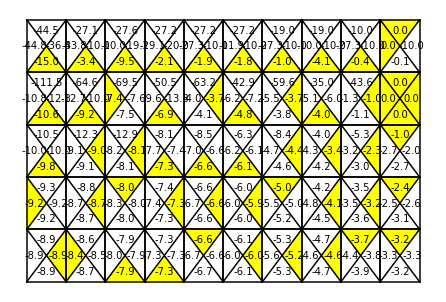

$\;After\,1000\,episodes$

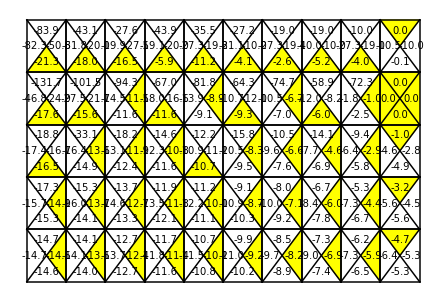

$\bullet\,Q-values\;of\;5-steps\;Sarsa$

$\;After\,1\,episode$

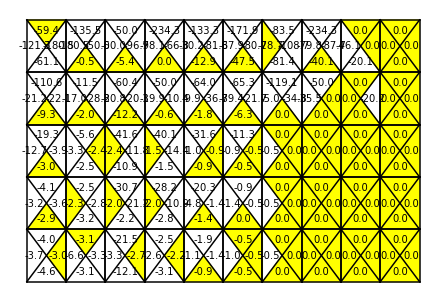

$\;After\,200\,episodes$

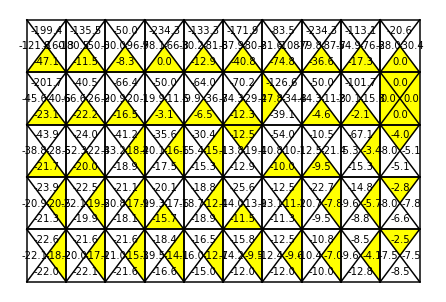

$\;After\,1000\,episodes$

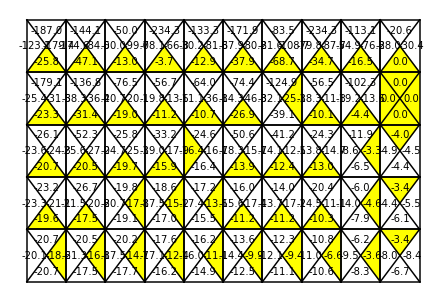

Ans 2.

對於Sarsa而言，其更新方式是每次只看一步的報酬，因此在學習速度上，不如每次看五步報酬的5-Step Sarsa，藉由觀察Average Rewards變化情形的同時也能看出，Sarsa和5-Step Sarsa學習速度上的差異。

5-Step Sarsa Average Rewards收斂較快，而雖然Sarsa一開始的表現不如5-Step Sarsa，然而在一段episodes學習過後，最後收斂值也會趨近5-Step Sarsa的結果，表現二者在學習速度上的差異。

由下圖可看出Sarsa和5-step Sarsa之間Average Rewards的關係。

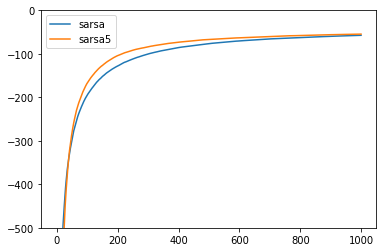

Ans 3.

由下圖可看出Sarsa與3-Step Sarsa、5-Step Sarsa之間Average Rewards的關係。

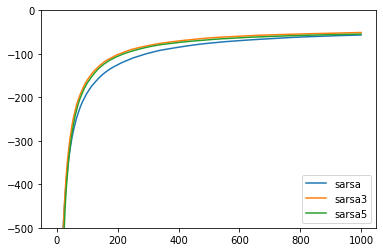